The reuters dataset can be cassified into single label multiple class.46 classes tobe exact.

In [14]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
train_data.shape

(8982,)

In [3]:
test_data.shape

(2246,)

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
import numpy as np

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [15]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
# categorical crossentropy is the best function is the best thing to use in this casse

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
import numpy as np

def vectorize_sequences(sequences , dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =  1
    return results


In [21]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
x_val  = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size=512, validation_data=(x_val, y_val))

W1102 15:51:38.678454  8064 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 630us/step - loss: 2.6761 - accuracy: 0.5175 - val_loss: 1.7456 - val_accuracy: 0.6300
Epoch 2/20
7982/7982 [==============================] - 2s 301us/step - loss: 1.4334 - accuracy: 0.6968 - val_loss: 1.3108 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 285us/step - loss: 1.0523 - accuracy: 0.7726 - val_loss: 1.1347 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 2s 284us/step - loss: 0.8264 - accuracy: 0.8255 - val_loss: 1.0203 - val_accuracy: 0.7900
Epoch 5/20
7982/7982 [==============================] - 2s 284us/step - loss: 0.6524 - accuracy: 0.8639 - val_loss: 0.9577 - val_accuracy: 0.8040
Epoch 6/20
7982/7982 [==============================] - 2s 282us/step - loss: 0.5231 - accuracy: 0.8882 - val_loss: 0.9242 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 2s 278us/step - loss

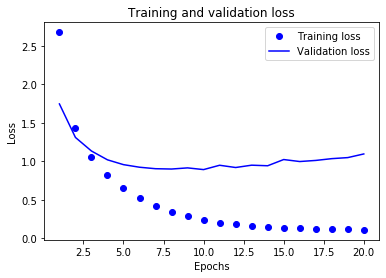

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [28]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

0.99999994

In [33]:
np.argmax(predictions[0])

3

In [34]:
#This is the result for x_test[0]

print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
